In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from get_data import get_dengue_data
from scipy.integrate import solve_ivp


Neste notebook, inicialmente foram fixados todos os parâmetros do modelo. A seguir, cada parâmetro foi variado considerando um intervalo plausível com base na literatura e foram plotas as curvas de indivíduos infectados e mosquitos. 

Esse passo foi realizado com o intuito de fornecer uma ideia de quais parâmetros tem um impacto maior na curva de infectados. Posteriormente essa análise será desenvolvida de forma mais pragmática através da análise de sensibilidade do modelo. 

In [2]:

# Os parâmetros abaixo são constantes e não serão fitados, por essa razão são definidos com letra maiúscula 
MU_H = 1/(365*76)    #human mortality rate - day^-1
THETA_H = 0.027   #intrinsic incubation rate - day^-1
ALPHA_H = 0.1 #recovering rate - day^-1
K = 0.5          #fraction of female mosquitoes hatched from all egs
c = 0.45    #mosquito carrying capacity
BETA_M = 0.75   #transmittion probability from human to mosquito
BETA_H = 0.75    #transmittion probability from mosquito to human
C_A = 0.0       #control effort rate on aquatic phase
C_M = 0.0    #control effort rate on terretrial phase
b = 0.5
# parâmetros fixados para esse caso: 
d = 5.6          #average oviposition rate - day^-1
mu_m = 0.055     #average mosquito mortality rate - day^-1
mu_a = 0.24      #average aquatic mortality rate - day^-1
gamma_m = 0.095  #average aquatic transition rate - day^-1
theta_m = 0.11   #extrinsic incubation - day^-1

def system_odes(t,x, parameters):

    #definindo parâmetros que vão ser fitados
    b, c, d, mu_m, mu_a, gamma_m, theta_m, THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M  = parameters

    #Colocando cada variável em uma posição:
    A  = x[0] #Aquatic mosquito population
    Ms = x[1] #Susceptible mosquitos population
    Me = x[2] #Exposed mosquitos population (infected but not infectious)
    Mi = x[3] #Infectious mosquitos population
    Hs = x[4] #Susceptible human population
    He = x[5] #Exposed human population
    Hi = x[6] #Infectious human population
    Hr = x[7] #Recovered Individuals

    #Definindo condições de contorno para as variáveis(?):
    M = A+Ms+Me+Mi  #População total de Mosquitos
    H = Hs+He+Hi+Hr #População total de humanos

    C = c*(10**4) 
    
    #Definindo cada ODE:
    dA_dt  = K*d*(1-(A/C))*M - (gamma_m + mu_a + C_A)*A
    dMs_dt = gamma_m*A - (b*BETA_M*Ms*Hi)/H - (mu_m + C_M)*Ms
    dMe_dt = (b*BETA_M*Ms*Hi)/H - (theta_m + mu_m + C_M)*Me
    dMi_dt = theta_m*Me - (mu_m + C_M)*Mi
    dHs_dt = MU_H*(H-Hs) - (b*BETA_H*Hs*Mi)/H
    dHe_dt = (b*BETA_H*Hs*Mi)/H - (THETA_H + MU_H)*He
    dHi_dt = THETA_H*He - (ALPHA_H + MU_H)*Hi
    dHr_dt = ALPHA_H*Hi - MU_H*Hr

    return [dA_dt, dMs_dt, dMe_dt, dMi_dt, dHs_dt, dHe_dt, dHi_dt, dHr_dt]

def solve_model(t, y0, parametros):
    
    r  = solve_ivp(system_odes, t_span = [ t[0], t[-1]], y0 = y0, t_eval = t, args=(parametros,)) 

    return r 


## Analisando os parâmetros relacionados ao mosquito: 

Variando a taxa média de mordidas (b):

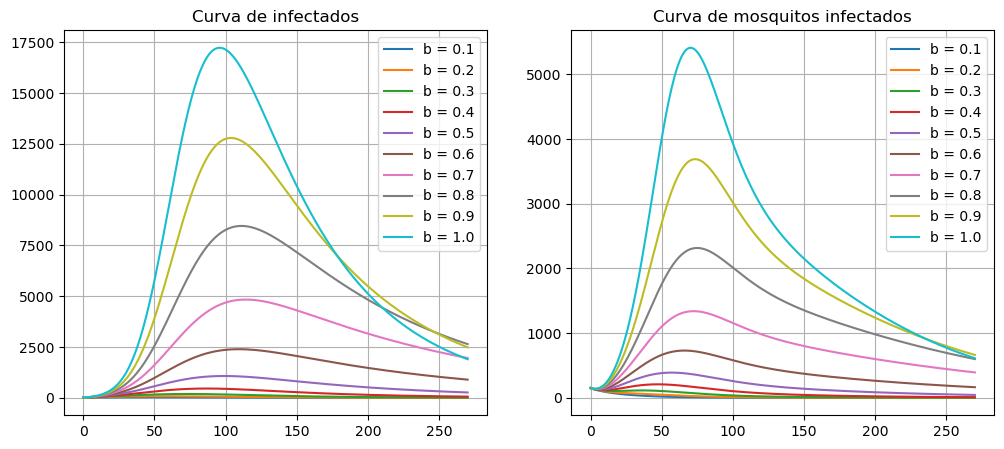

In [3]:
t = np.arange(0, 271)
N = 256088

y0 = [10**4, 2*N, 0, 150, N, 0, 21, 0]

fig, ax = plt.subplots(1,2, figsize = (12,5))

for b in np.arange(0.1, 1.1, 0.1):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m, THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'b = {round(b, 2)}')
    
    ax[1].plot(t, r.y[3], label = f'b = {round(b, 2)}')


b = 0.5

#ax[0].scatter(df.index, 100*df.probable, label = 'Prováveis')#
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()

plt.show()


Variando a capacidade suporte (C): 

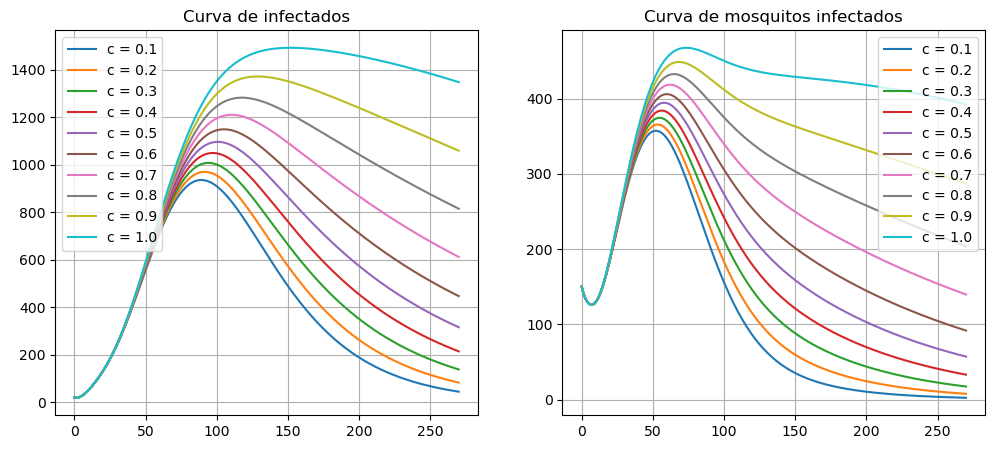

In [4]:


fig, ax = plt.subplots(1,2, figsize = (12,5))

for c in np.arange(0.1, 1.1, 0.1):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'c = {round(c, 2)}')
    ax[1].plot(t, r.y[3], label = f'c = {round(c, 2)}')

c = 0.4
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()

Variando a taxa média de ovoposição (delta): 

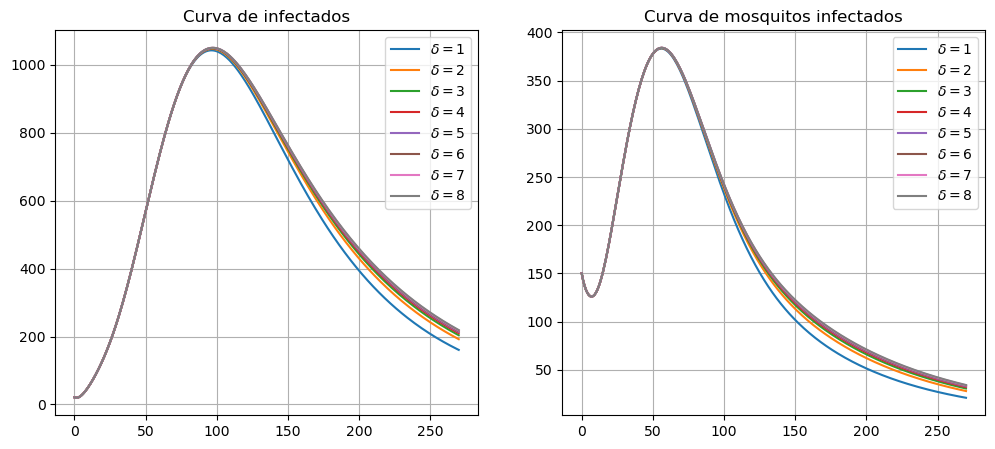

In [5]:

fig, ax = plt.subplots(1,2, figsize = (12,5))

for d in np.arange(1, 9, 1):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m, THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M 

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'$\delta = {d}$')
    
    ax[1].plot(t, r.y[3], label = f'$\delta = {d}$')
    
d = 5.6
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()


Variando a taxa de mortalidade do mosquito (mu_m): 

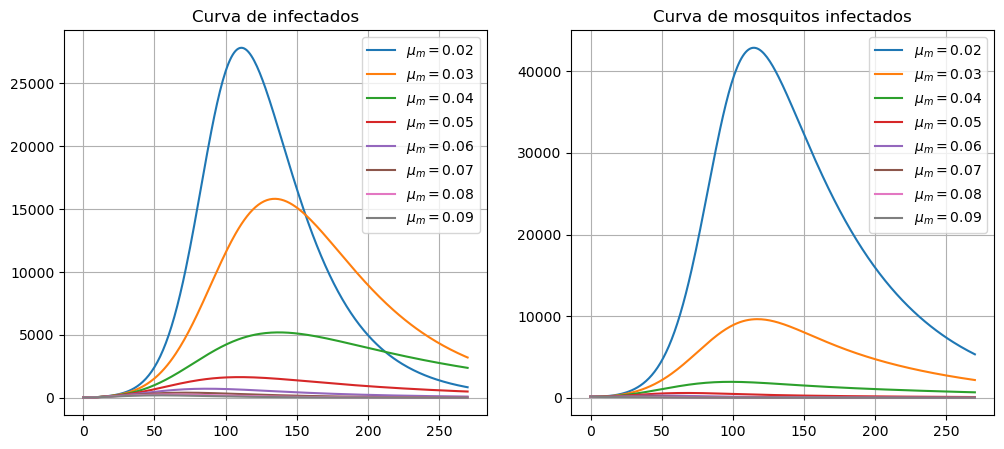

In [6]:


fig, ax = plt.subplots(1,2, figsize = (12,5))

for mu_m in np.arange(0.02, 0.1, 0.01):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'$\mu_m = {round(mu_m, 2)}$')
    
    ax[1].plot(t, r.y[3], label = f'$\mu_m = {round(mu_m, 2)}$')
    
    
mum_m = 0.055
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()


Variando a taxa de mortalidade aquática (mu_a):

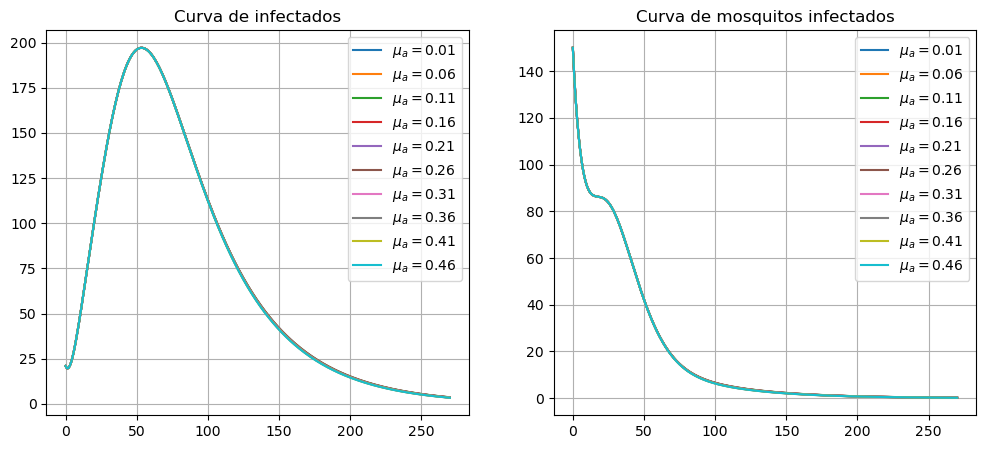

In [7]:

fig, ax = plt.subplots(1,2, figsize = (12,5))

for mu_a in np.arange(0.01, 0.49, 0.05):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'$\mu_a = {round(mu_a,2)}$')
    
    ax[1].plot(t, r.y[3], label = f'$\mu_a = {round(mu_a,2)}$')
    
       
mu_a = 0.24
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()


Variando a taxa de transição aquática (gamma_m): 

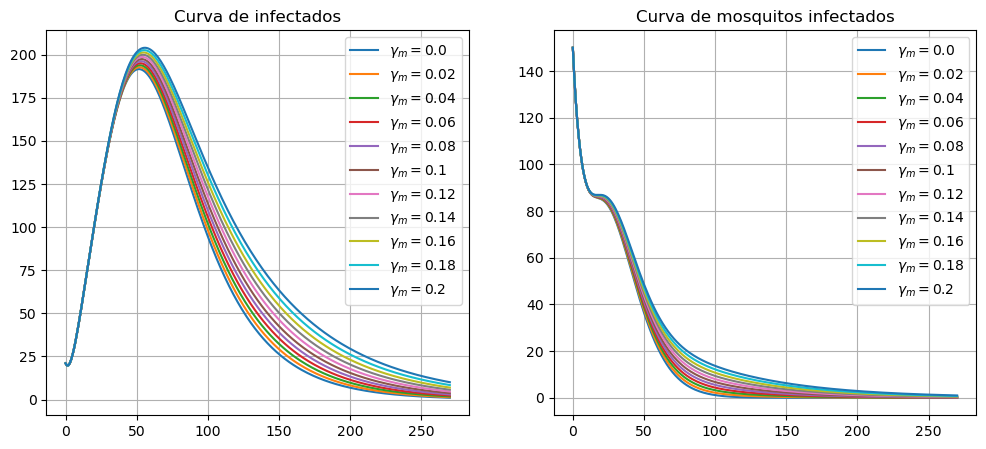

In [8]:


fig, ax = plt.subplots(1,2, figsize = (12,5))

for gamma_m in np.arange(0.00, 0.21, 0.02):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'$\gamma_m = {round(gamma_m, 2)}$')
    
    ax[1].plot(t, r.y[3], label = f'$\gamma_m = {round(gamma_m, 2)}$')
    
    
gamma_m = 0.095
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()


Variando a taxa de incubação extrinsíca (theta_m): 

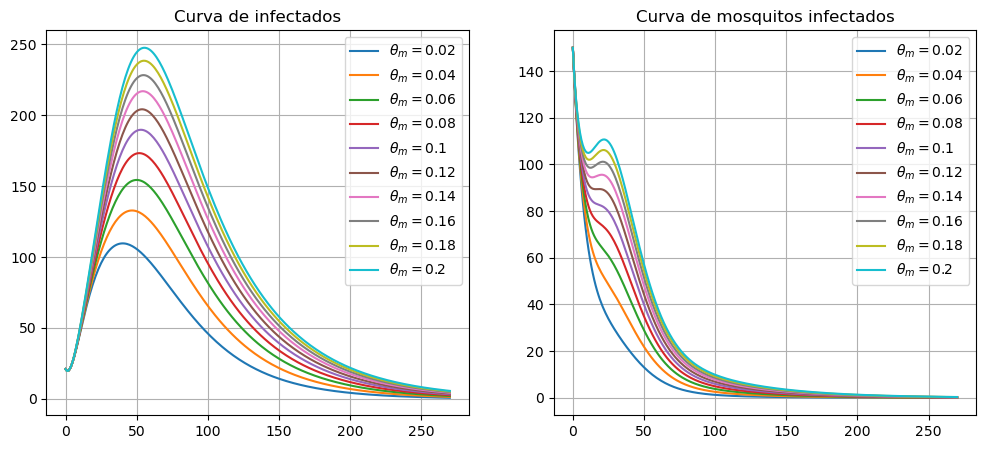

In [9]:




fig, ax = plt.subplots(1,2, figsize = (12,5))

for theta_m in np.arange(0.02, 0.22, 0.02):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'$\\theta _m = {theta_m}$')
    
    ax[1].plot(t, r.y[3], label = f'$\\theta _m = {theta_m}$')
    
    
theta_m = 0.11
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()


Variando o probabilidade de transmissão de humano para mosquito (beta_m): 

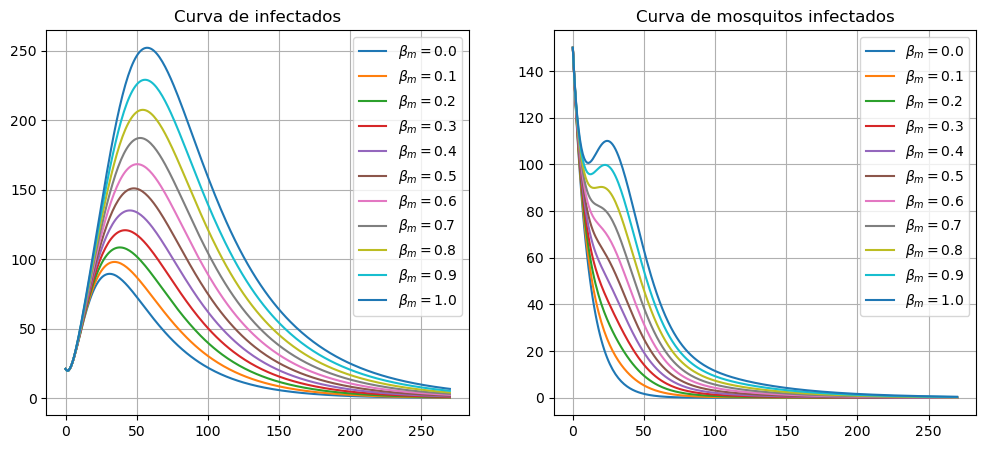

In [10]:

fig, ax = plt.subplots(1,2, figsize = (12,5))

for BETA_M in np.arange(0.0, 1.1, 0.1):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'$\\beta_m = {round(BETA_M, 2)}$')
    
    ax[1].plot(t, r.y[3], label = f'$\\beta_m = {round(BETA_M, 2)}$')
    
    
theta_m = 0.11
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()

## Analisando as condições iniciais relacionadas ao mosquito: 

Variando o A0:

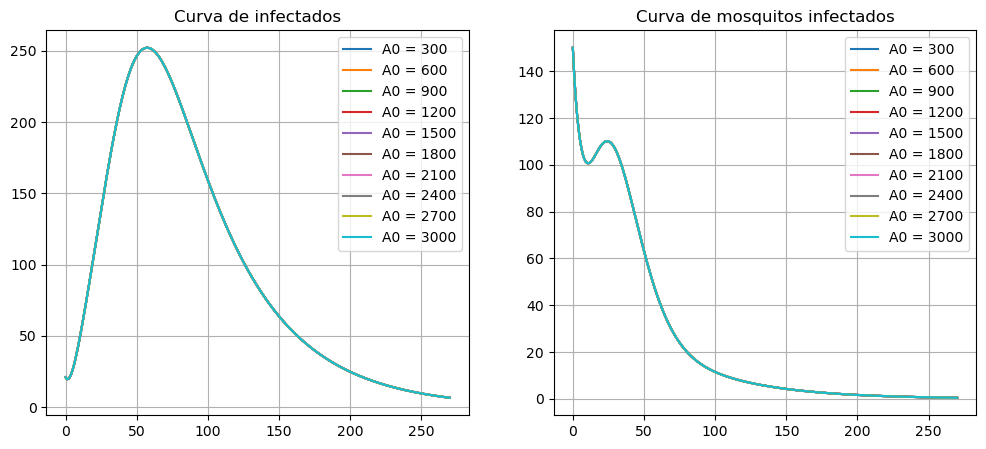

In [11]:

fig, ax = plt.subplots(1,2, figsize = (12,5))

for A0 in np.arange(300, 3300, 300):
    
    y0 = [A0, 2*N, 0, 150, N, 0, 21, 0]
    
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'A0 = {A0}')
    
    ax[1].plot(t, r.y[3], label = f'A0 = {A0}')
    
    
A0 = 100
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()


Variando o MS0: 

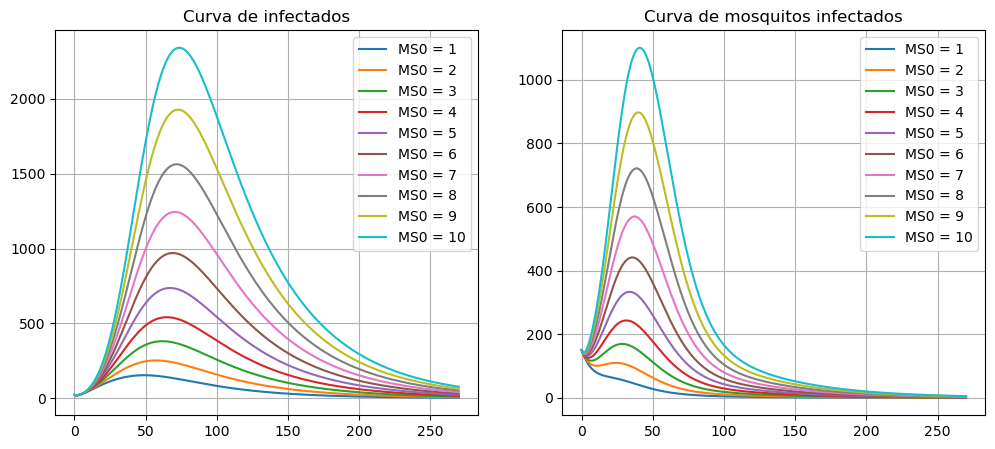

In [12]:

fig, ax = plt.subplots(1,2, figsize = (12,5))

for d in np.arange(1, 11, 1):
    
    y0 = [2000, d*N, 0, 150, N, 0, 21, 0]
    
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'MS0 = {d}')
    
    ax[1].plot(t, r.y[3], label = f'MS0 = {d}')
    
    
MS0 = 3000
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()

Variando MI0:

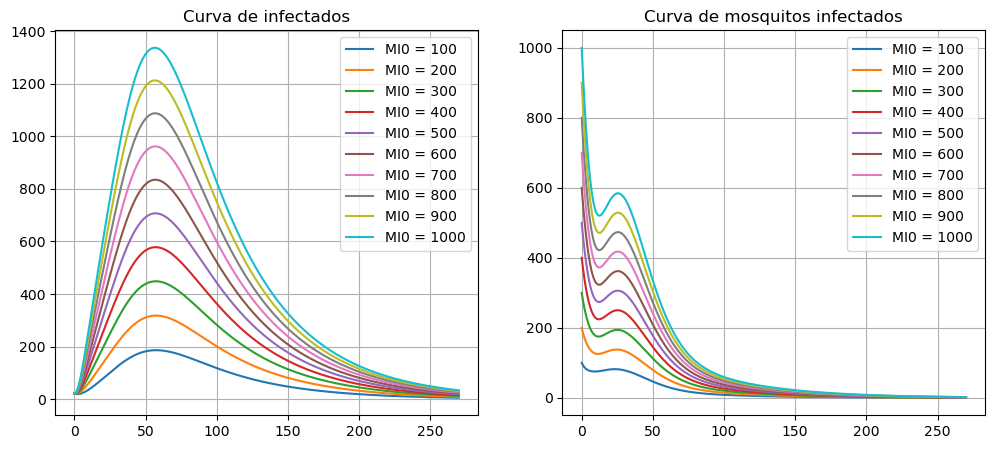

In [13]:


fig, ax = plt.subplots(1,2, figsize = (12,5))

for MI0 in np.arange(100, 1100, 100):
    
    y0 = [2000, 2*N, 0, MI0, N, 0, 21, 0]
    
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'MI0 = {MI0}')
    
    ax[1].plot(t, r.y[3], label = f'MI0 = {MI0}')
    
MS0 = 3000
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()

Variando o ME0:

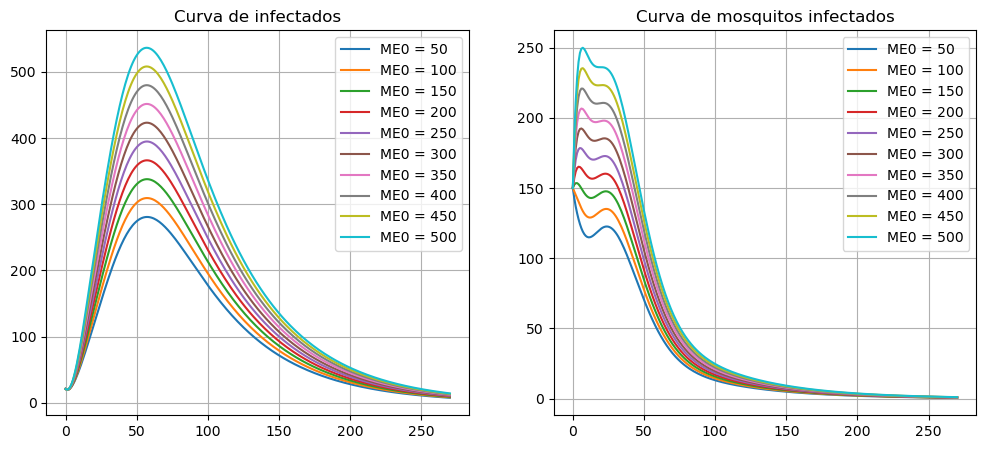

In [14]:

fig, ax = plt.subplots(1,2, figsize = (12,5))

for ME0 in np.arange(50, 550, 50):
    
    y0 = [2000, 2*N, ME0, 150, N, 0, 21, 0]
    
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , THETA_H, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'ME0 = {ME0}')
    
    ax[1].plot(t, r.y[3], label = f'ME0 = {ME0}')

ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()

## Analisando os parâmetros relacionados ao humano: 

Variando a taxa de incubação intríseca:

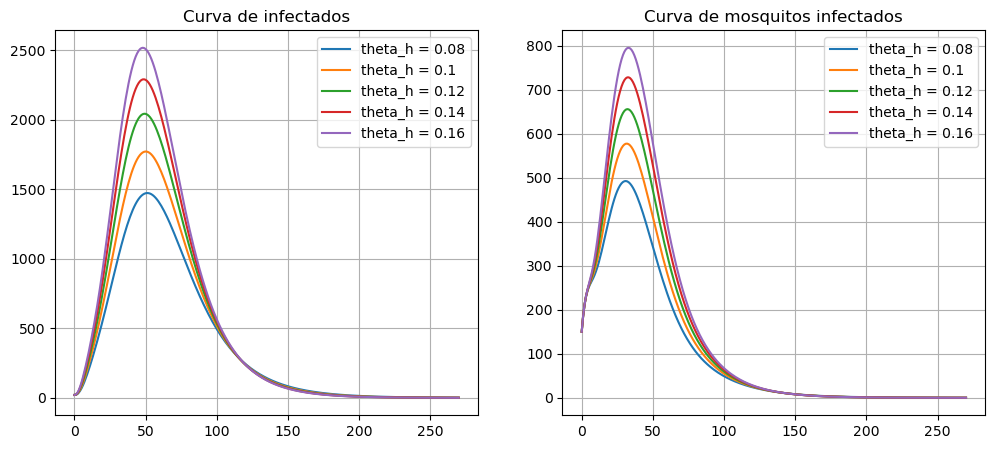

In [15]:
fig, ax = plt.subplots(1,2, figsize = (12,5))


for theta_h in np.arange(0.08, 0.18, 0.02):
    par_fix = b, c, d, mu_m, mu_a, gamma_m, theta_m , theta_h, ALPHA_H, BETA_M, BETA_H , C_A, C_M

    r = solve_model(t, y0, par_fix)
    
    ax[0].plot(t, r.y[6], label = f'theta_h = {round(theta_h, 3)}')
    ax[1].plot(t, r.y[3], label = f'theta_h = {round(theta_h, 3)}')

c = 0.4
ax[0].legend()
ax[0].set_title('Curva de infectados')
ax[0].grid()

ax[1].legend()
ax[1].set_title('Curva de mosquitos infectados')
ax[1].grid()
plt.show()